# Predict Movie Revenue

### why writers, directors, and stars are not x-variables 
Using categorical variables with a large number of distinct values (also known as high cardinality) in machine learning models can create several challenges:

- **Overfitting**: High cardinality variables can cause overfitting, where the model learns the noise in the data rather than the underlying pattern. When a categorical variable has many unique values, the model may create complex decision boundaries that do not generalize well.

- **Increased Complexity**: The presence of numerous distinct categories leads to a significant increase in the model's complexity. This can result in higher computational costs and memory usage, slowing down model training and prediction.

- **Reduced Interpretability**: Models with high cardinality variables are often more challenging to interpret, making it difficult to understand which factors are driving predictions.

- **Sparse Data**: When encoding high cardinality categorical variables, the data can become sparse, reducing the effectiveness of certain machine learning algorithms.

- **Dimensionality Issues**: When using one-hot encoding, high cardinality variables lead to a large increase in dimensionality, which can be problematic for many algorithms, especially those sensitive to high-dimensional data.

### why positive, neutral, negative sentiments are used as x-variables instead of favorability
In this dataset, the definition of the derived variable favorability score is 
$ favorability = \frac{ positive }{ total - neutral }$

- **Misleading Correlations**: Derived variables can introduce misleading correlations into the model. If not carefully designed, these correlations can create spurious relationships that do not reflect the true nature of the underlying data.

# Overview of the model used
- Linear Regression
- Polynomial Regression
- Random Forest Regression
- Decision Tree Regression
- Gradient Boosting Machines Regression
- Artificial Neural Network

Comparing Criteria: 
We compare the models' efficiency by looking at their Mean Squared Error, Mean Absolute Error and R-squared. 

**Mean Squared Error (MSE)**:
- MSE is a measure of the average squared difference between the actual outcomes and the predicted outcomes in a regression model. It captures the magnitude of errors in a way that emphasizes larger errors.
- It is calculated as:
  $ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
  where $y_i$ represents the actual values, $ \hat{y}_i $ are the predicted values, and $ n $ is the number of observations.
- A lower MSE indicates that the predictions are closer to the actual values. However, because it squares the errors, it is more sensitive to outliers.

**Mean Absolute Error (MAE)**:
- MAE is the average of the absolute differences between the actual outcomes and the predicted outcomes in a regression model. It is a straightforward measure that indicates the average size of the errors without emphasizing larger errors.
- It is calculated as:
  $ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $
  where $y_i$ represents the actual values, $ \hat{y}_i $ are the predicted values, and $ n $ is the number of observations.
- A lower MAE indicates that the predictions are closer to the actual values. Because it uses absolute values, MAE is less sensitive to outliers compared to MSE.

**R-squared (R²)**:
- R² is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It provides an indication of how well the independent variables explain the variation in the dependent variable.
- It is calculated as:
  $ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $
  where $ SS_{res} $ is the sum of squares of the residuals (errors) and $ SS_{tot} $ is the total sum of squares (variance of the dependent variable).
- R² values range from 0 to 1, where 1 indicates a perfect fit, and 0 indicates that the independent variables do not explain any variance in the dependent variable. A higher R² indicates a better fit of the model to the data.

In [26]:
!pip install tensorflow
!pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

2024-04-24 19:30:30.024908: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Linear Regression (with sqrt(x), and only consist of numeric variable)
From the previous data visualisation, we found that the numerical datasets: budget, votes, runtime, and gross revenue are all right-skewed. Hence, we square-root these datasets before doing this regression model to get a more balanced result. 

1. **Mean Squared Error (MSE)**:
   - This is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model.
   - A lower MSE indicates that the model's predictions are closer to the actual values. An MSE of 307.14906047269767 indicates that, on average, the squared errors in the model's predictions are about 307.15. Although lower MSE is better, this value alone does not indicate how good or bad the model is.

2. **R-squared (R²)**:
   - This metric measures the proportion of variance in the dependent variable that can be explained by the independent variables in the model.
   - An R² of 0.7134212654596059 means that about 71.34% of the variability in the dependent variable can be explained by the independent variables used in the model. Higher R² values indicate better model fit, with 1.0 being a perfect fit. This R² value suggests a fairly strong fit.

3. **Model Coefficients**:
     - `sqrt_votes: 0.075421`: A one-unit increase in the square root of votes leads to an expected increase of 0.075421 in the dependent variable.
     - `positive_sentiment: 0.010130`: A one-unit increase in positive sentiment results in an expected increase of 0.010130 in the dependent variable.
     - `sqrt_budget: 0.006244`: A one-unit increase in the square root of the budget leads to an expected increase of 0.006244 in the dependent variable.
     - `sqrt_runtime: -3.261944`: A one-unit increase in the square root of runtime leads to an expected decrease of 3.261944 in the dependent variable.

### Summary
Overall, this linear regression model seems to have a reasonably good fit, with over 70% of the variance explained by the independent variables. The coefficients provide insights into the direction and magnitude of the relationships between the independent variables and the dependent variable.

In [66]:
# Ensure necessary packages are imported
import math

# Load the dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Apply square root to the 'budget' column, as it is right-skewed
df['sqrt_budget'] = np.sqrt(df['budget'])
df['sqrt_votes'] = np.sqrt(df['votes'])
df['sqrt_runtime'] = np.sqrt(df['runtime'])
df['sqrt_gross'] = np.sqrt(df['gross'])

# Set the target variable (gross revenue) and the features (budget, votes, runtime,positive_sentiment,neutral_sentiment)
# Apply square root to the 'gross' column, as it is right-skewed
X = df[['sqrt_budget','sqrt_votes','sqrt_runtime', 'positive_sentiment']]
y = np.sqrt(df['sqrt_gross'])

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a Linear Regression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Predict the test data
y_pred = lin_reg.predict(X_test)

# Evaluate the model performance with Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the coefficients of the model to understand feature importance
coefficients = pd.Series(lin_reg.coef_, index=X_train.columns).sort_values(ascending=False)

# Return the MSE, R-squared, and the model coefficients
mse, r2, coefficients  # Display the model's MSE, R-squared, and coefficients

(307.14906047269767,
 0.7134212654596059,
 sqrt_votes            0.075421
 positive_sentiment    0.010130
 sqrt_budget           0.006244
 sqrt_runtime         -3.261944
 dtype: float64)

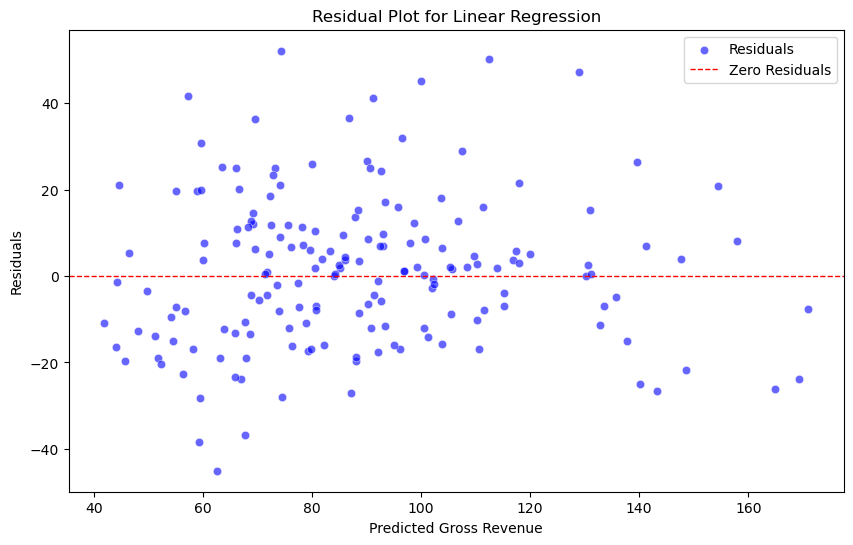

(17.525668616994263,
 0.7250000590360459,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             sqrt_gross   R-squared:                       0.727
 Model:                            OLS   Adj. R-squared:                  0.725
 Method:                 Least Squares   F-statistic:                     461.0
 Date:                Wed, 24 Apr 2024   Prob (F-statistic):          9.67e-194
 Time:                        15:27:41   Log-Likelihood:                -3000.4
 No. Observations:                 699   AIC:                             6011.
 Df Residuals:                     694   BIC:                             6034.
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals (difference between predicted and actual values)
residuals = y_test - y_pred

# Residual plot to check for patterns or non-linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Residuals')
plt.xlabel("Predicted Gross Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.legend()
plt.show()

# Additional metrics for goodness of fit
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Fit a linear regression model with statsmodels to get additional statistics
X_train_with_const = sm.add_constant(X_train)  # Add constant to model for intercept
stats_model = sm.OLS(y_train, X_train_with_const).fit()  # Fit the linear regression model

# Adjusted R-squared and summary statistics
adjusted_r_squared = stats_model.rsquared_adj
summary_statistics = stats_model.summary()

# Return RMSE, adjusted R-squared, and model summary
rmse, adjusted_r_squared, summary_statistics  # Display RMSE, adjusted R-squared, and model summary

# Model Evaluation and Comparison

## Linear Regression
- **Mean Squared Error (MSE)**: 1.4534335475853688e+16
- **Mean Absolute Error (MAE)**: 80326194.23195906
- **R-squared (R²)**: 0.6155482224811859

Linear Regression shows moderate performance with a relatively high MSE and MAE but a reasonably good R-squared value.

## Random Forest
- **Mean Squared Error (MSE)**: 1.146212998610999e+16
- **Mean Absolute Error (MAE)**: 54560298.72357414
- **R-squared (R²)**: 0.6968119901571999

Random Forest performs better than Linear Regression, with lower MSE and MAE and a higher R-squared value, indicating improved predictive power and reduced errors.

## Decision Tree
- **Mean Squared Error (MSE)**: 1.937408929865077e+16
- **Mean Absolute Error (MAE)**: 75899119.98479088
- **R-squared (R²)**: 0.48753053890569886

Decision Tree exhibits the poorest performance among the models, with the highest MSE and a low R-squared, indicating a weaker predictive capacity.

## Gradient Boosting Machines
- **Mean Squared Error (MSE)**: 1.1702875710732642e+16
- **Mean Absolute Error (MAE)**: 56598477.13335808
- **R-squared (R²)**: 0.6904439575825426

Gradient Boosting Machines (GBM) show strong performance, with low MSE and high R-squared, closely matching Random Forest in overall results.

## ANN (Artificial Neural Network)
- **Mean Squared Error (MSE)**: 1.5874097596384716e+16
- **Mean Absolute Error (MAE)**: 67712905.29651853
- **R-squared (R²)**: 0.5801097994761413

The ANN model exhibits a moderate performance with a higher MSE and MAE compared to GBM and Random Forest, but a lower R-squared, suggesting a lower fit to the data.

## Conclusion
Among the models evaluated, Random Forest and Gradient Boosting Machines show the best performance with lower MSE and MAE values and higher R-squared values. Linear Regression and ANN models have moderate performance, while the Decision Tree model shows the weakest results with high MSE and low R-squared. Depending on the use case and complexity requirements, Random Forest or Gradient Boosting Machines may be the preferred models.

## Thinking about Large MAE
A large Mean Absolute Error (MAE) often indicates that the absolute differences between actual and predicted values are high, suggesting several potential reasons:

- **Scale Mismatch**: The target variable "gross" has a larger scale compared to the feature variables, so it can lead to higher MAE values. When the scale of the output is much larger than the inputs, the model might find it challenging to predict with high accuracy.

- **Model Fit and Complexity**: The model is not complex enough to capture the underlying patterns in the data or is underfitting. The model may do not include enough features or lacks the necessary complexity to represent the data's variability.

In [20]:
# Load the dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Remove unnecessary columns
relevant_columns = ['rating', 'genre', 'votes', 'budget' ,'runtime','company',
                    'positive_sentiment', 'neutral_sentiment','negative_sentiment', 'gross']
prepared_df = df[relevant_columns]

# One-hot encode categorical variables
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_vars = ['rating', 'genre','company']
encoded_vars = ohe.fit_transform(prepared_df[categorical_vars])

# Convert to DataFrame and assign column names
encoded_df = pd.DataFrame(encoded_vars, columns=ohe.get_feature_names_out(categorical_vars))

# Replace categorical columns with encoded columns
final_df = pd.concat([prepared_df.drop(columns=categorical_vars), encoded_df], axis=1)

# Define the features (X) and the target (y)
X = final_df.drop(columns=['gross'])
y = final_df['gross']

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(611, 350) (263, 350) (611,) (263,)


# Linear Regression (with out Log(x), include categorical variables)

In [21]:
# Define the linear regression model
linear_regression = LinearRegression()

# Train the linear regression model on the training set
linear_regression.fit(X_train, y_train)

# Make predictions and evaluate the model on the test set
y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.4534335475853688e+16
Mean Absolute Error: 80326194.23195906
R-squared: 0.6155482224811859


### Scatter Plot of Predictions vs. Actuals

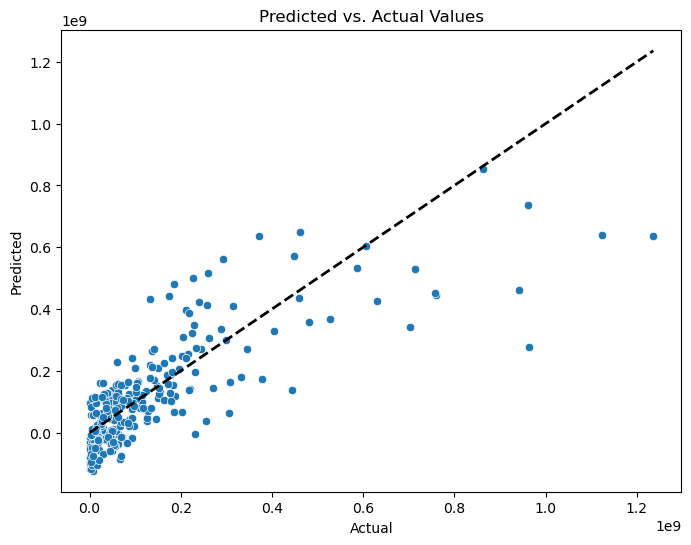

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for ideal predictions
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")
plt.show()

### Residual Plot

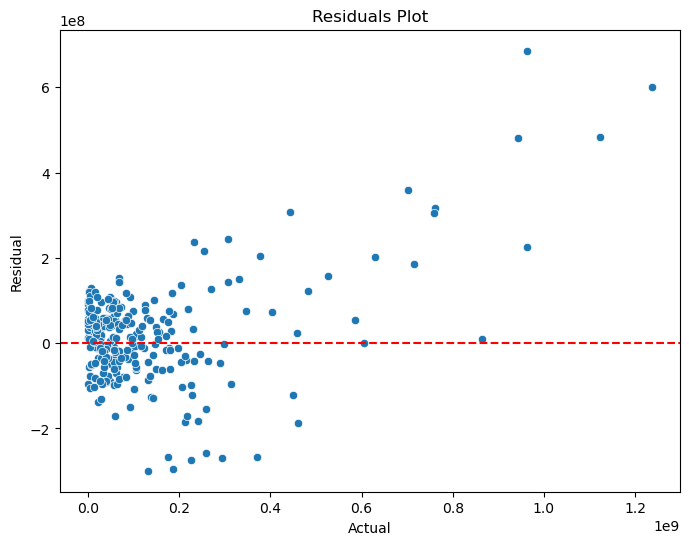

In [23]:
# Plot of residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Line indicating zero residuals
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residuals Plot")
plt.show()

### Distribution of Residuals

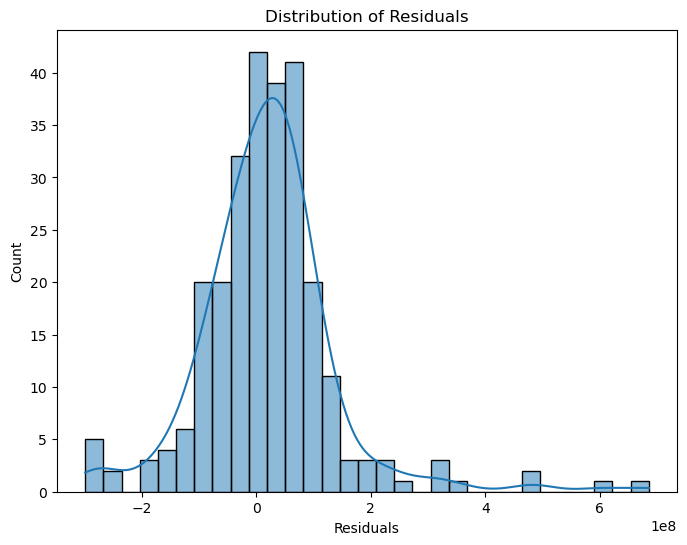

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)  # Histogram with KDE plot
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Polynomial Regression

In [25]:
# Define a polynomial regression model with degree 2
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_pipeline = Pipeline([
    ('polynomial_features', polynomial_features),
    ('linear_regression', LinearRegression())
])

# Train the polynomial regression model on the training set
polynomial_pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model on the test set
y_pred = polynomial_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2.692160325160681e+17
Mean Absolute Error: 204918138.65969267
R-squared: -6.121108660888814


### Predicted vs Actual Plot

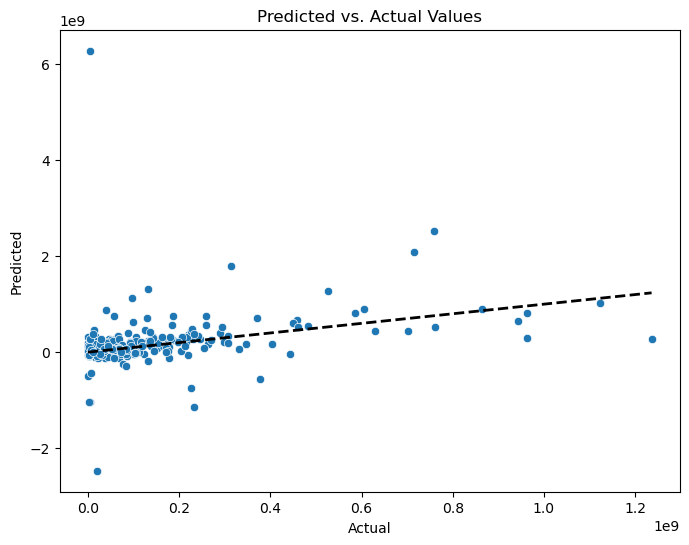

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")
plt.show()

###  Residual Plot

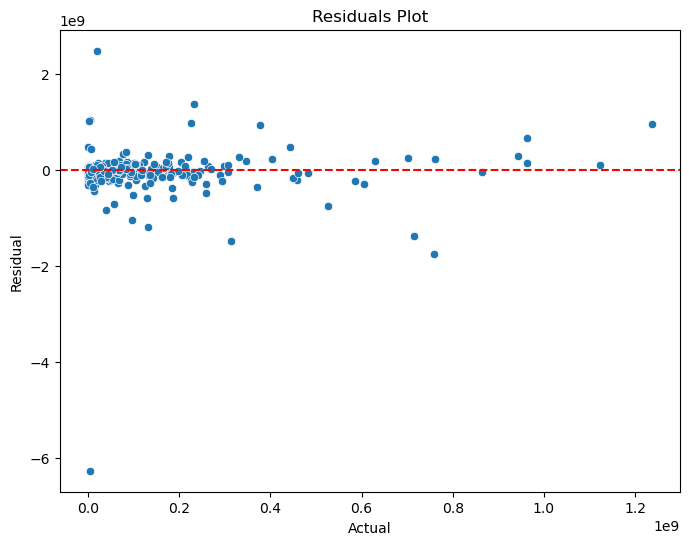

In [27]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residuals Plot")
plt.show()

# Random Forest

In [46]:
# Define the Random Forest regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest regressor on the training set
random_forest.fit(X_train, y_train)

# Make predictions and evaluate the model on the test set
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.146212998610999e+16
Mean Absolute Error: 54560298.72357414
R-squared: 0.6968119901571999


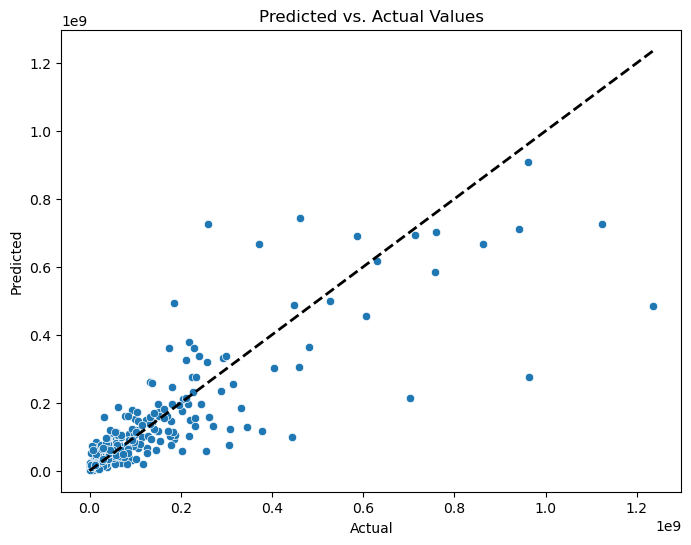

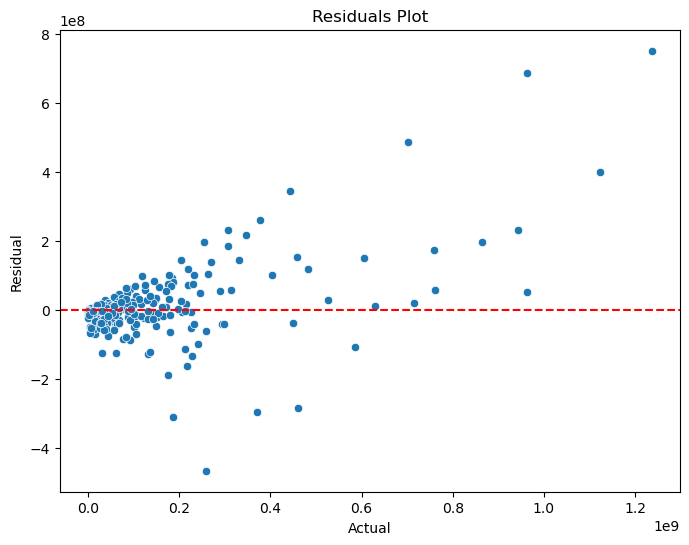

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")
plt.show()
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residuals Plot")
plt.show()

# Decision Tree

In [39]:
# Define the Decision Tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree regressor on the training set
decision_tree.fit(X_train, y_train)

# Make predictions and evaluate the model on the test set
y_pred = decision_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.937408929865077e+16
Mean Absolute Error: 75899119.98479088
R-squared: 0.48753053890569886


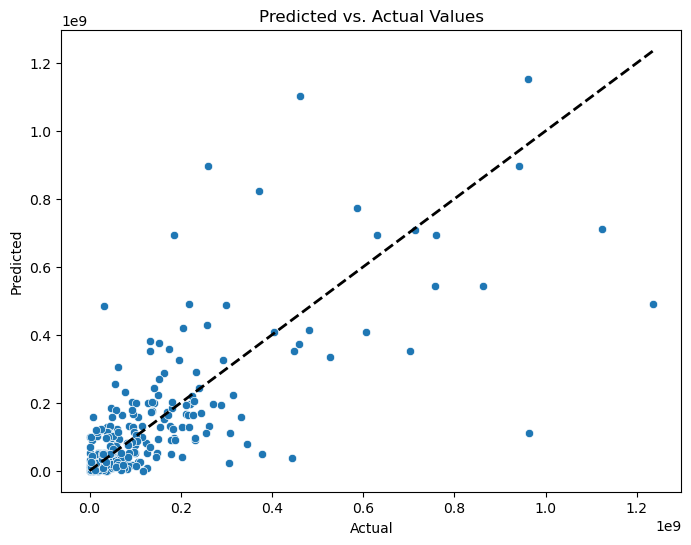

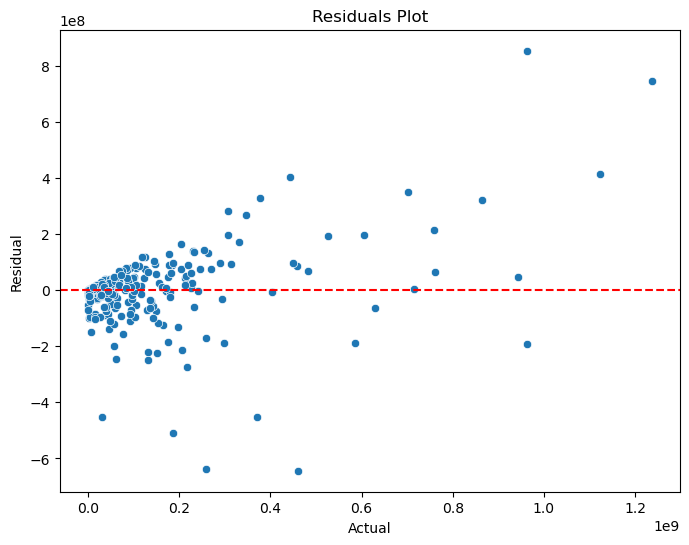

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")
plt.show()
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residuals Plot")
plt.show()

### Decision path
To understand how a single instance is classified by the decision tree, we can visualize the decision path. This will display the decision path for the chosen instance, showing which features were used and the decision made at each node.

In [33]:
from sklearn.tree import export_text

# Choose a single instance from the test set (adjust index as needed)
instance_index = 0
instance = X_test.iloc[[instance_index]]
decision_path = export_text(decision_tree, feature_names=list(X.columns))
print(decision_path)

|--- budget <= 96000000.00
|   |--- votes <= 108500.00
|   |   |--- budget <= 20750000.00
|   |   |   |--- genre_Horror <= 0.50
|   |   |   |   |--- rating_R <= 0.50
|   |   |   |   |   |--- negative_sentiment <= 24.50
|   |   |   |   |   |   |--- company_Metro-Goldwyn-Mayer (MGM) <= 0.50
|   |   |   |   |   |   |   |--- company_Lions Gate Films <= 0.50
|   |   |   |   |   |   |   |   |--- votes <= 69500.00
|   |   |   |   |   |   |   |   |   |--- budget <= 16300000.00
|   |   |   |   |   |   |   |   |   |   |--- positive_sentiment <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- positive_sentiment >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- budget >  16300000.00
|   |   |   |   |   |   |   |   |   |   |--- budget <= 19750000.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |  

# Gradient Boosting Machines

In [36]:
# Define the Gradient Boosting regressor
gradient_boosting = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the Gradient Boosting regressor on the training set
gradient_boosting.fit(X_train, y_train)

# Make predictions and evaluate the model on the test set
y_pred = gradient_boosting.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.1702875710732642e+16
Mean Absolute Error: 56598477.13335808
R-squared: 0.6904439575825426


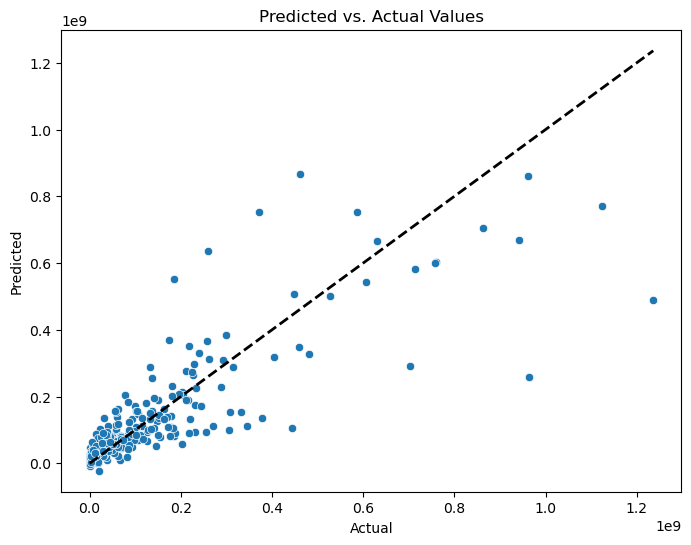

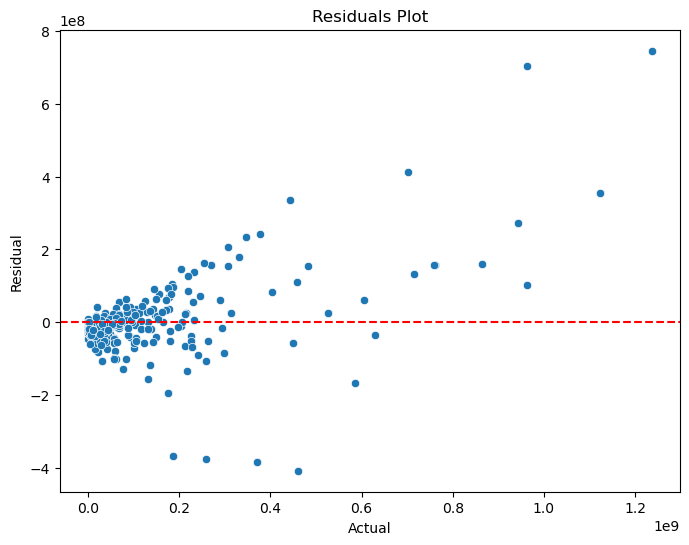

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")
plt.show()
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residuals Plot")
plt.show()

# Ariticial Neural Network

In [41]:
# Define an Artificial Neural Network (ANN) with a simple architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(1)  # Output layer for regression (single output neuron)
])

# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with a validation split
model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Make predictions and evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

/Users/sunjiayu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 45331790671380480.0000 - val_loss: 33524597009678336.0000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48358312390950912.0000 - val_loss: 29297445099798528.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39059463381975040.0000 - val_loss: 23870644399636480.0000
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32531909808488448.0000 - val_loss: 17502210774532096.0000
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22949174198665216.0000 - val_loss: 12002739227721728.0000
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12592694861758464.0000 - val_loss: 10543766754557952.0000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10850164352745472.0000 - val_loss: 11091375084797952.0000
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11687111744815104.0000 - val_loss: 11282202629242880.0000
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1139

## Analysis of learning curve:

- **Training Loss Trend**: The training loss has a fluctuating trend with ups and downs. This instability could suggest that the model is struggling to converge or that there is noise in the training process.

- **Validation Loss Trend**: The validation loss shows a relatively stable trend, with less fluctuation than the training loss. This suggests that the model is generalizing well, despite the instability in the training loss.

- **Gap Between Training and Validation Losses**: The gap between the training and validation losses remains relatively consistent, suggesting that the model is not severely overfitting. A significant and widening gap might indicate overfitting, while a converging gap could indicate underfitting.

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12212162906816512.0000 - val_loss: 10739129784467456.0000
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12627710656380928.0000 - val_loss: 11024390774849536.0000
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13734243481944064.0000 - val_loss: 11030571232788480.0000
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11272793429639168.0000 - val_loss: 11734768701931520.0000
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11702531751149568.0000 - val_loss: 11268576845496320.0000
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13095494871941120.0000 - val_loss: 12279600335814656.0000
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13769317258625024.0000 - val_loss: 11760947601342464.0000
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12772488635219968.0000 - val_loss: 10894536733622272.0000
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1275

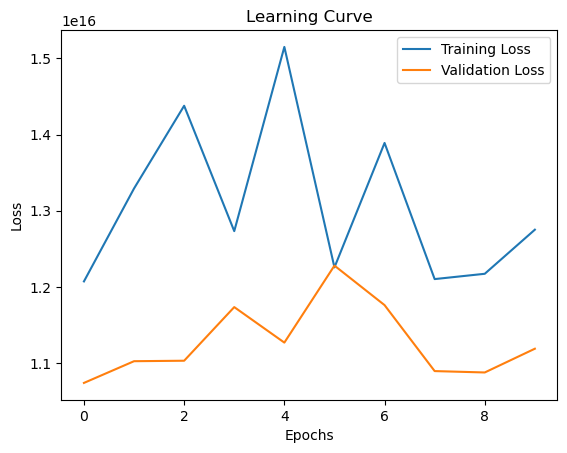

In [42]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

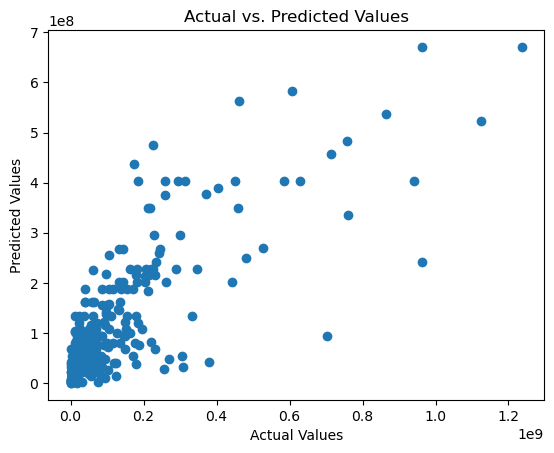

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

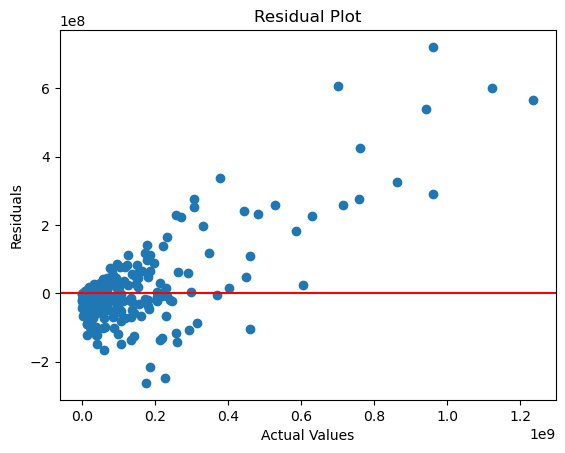

In [45]:
residuals = y_test - y_pred.flatten()
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()